In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing the data
calories = pd.read_csv('C:/Users/oyedeepak/Downloads/Assignment/Simple Linear Regression/calories_consumed.csv')

In [3]:
calories.columns

Index(['weight_gained', 'calories_consumed'], dtype='object')

(array([6., 2., 2., 0., 0., 1., 1., 0., 1., 1.]),
 array([  62. ,  165.8,  269.6,  373.4,  477.2,  581. ,  684.8,  788.6,
         892.4,  996.2, 1100. ]),
 <a list of 10 Patch objects>)

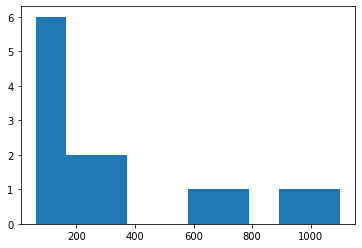

In [4]:
#plotting histogram
plt.hist(calories.weight_gained)

(array([3., 1., 2., 2., 1., 2., 1., 0., 1., 1.]),
 array([1400., 1650., 1900., 2150., 2400., 2650., 2900., 3150., 3400.,
        3650., 3900.]),
 <a list of 10 Patch objects>)

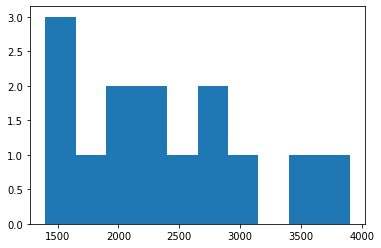

In [5]:
plt.hist(calories.calories_consumed)

{'whiskers': [<matplotlib.lines.Line2D at 0x24252f6fb88>,
 'caps': [<matplotlib.lines.Line2D at 0x24252f75b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x24252f13dc8>],
 'medians': [<matplotlib.lines.Line2D at 0x24252f79ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x24252f79bc8>],
 'means': []}

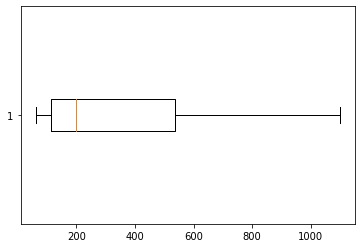

In [7]:
#plotting boxplot
plt.boxplot(calories.weight_gained, vert= False)

Text(0, 0.5, 'Weight')

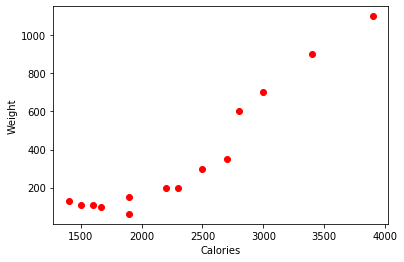

In [8]:
plt.plot(calories.calories_consumed,calories.weight_gained,"ro");plt.xlabel("Calories");plt.ylabel("Weight")


(array([6., 2., 2., 0., 0., 1., 1., 0., 1., 1.]),
 array([  62. ,  165.8,  269.6,  373.4,  477.2,  581. ,  684.8,  788.6,
         892.4,  996.2, 1100. ]),
 <a list of 10 Patch objects>)

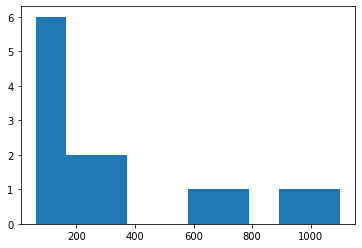

In [9]:
plt.hist(calories.weight_gained)

In [10]:
calories.corr()

,weight_gained,calories_consumed
weight_gained,1.000000,0.946991
calories_consumed,0.946991,1.000000


In [11]:
import statsmodels.formula.api as smf


In [13]:
#model 1

model1 = smf.ols('weight_gained~calories_consumed', data = calories).fit()
type(model1)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [14]:
model1.params

Intercept           -625.752356
calories_consumed      0.420157
dtype: float64

In [15]:
model1.summary()

C:\Users\oyedeepak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          weight_gained   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Mon, 11 May 2020   Prob (F-statistic):           2.86e-07
Time:                        20:34:28   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -625.7524    100.823     -6.206      0.000    -845.427    -406.078
calories_consumed     0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model1.conf_int(0.05)

,0,1
Intercept,-845.426655,-406.078057
calories_consumed,0.330506,0.509807


In [17]:
pred = model1.predict(calories)

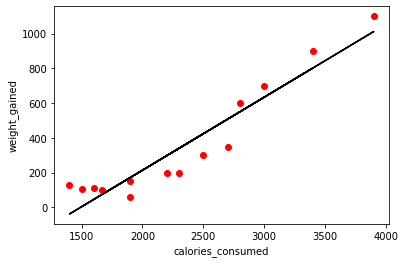

In [18]:
plt.scatter(x=calories['calories_consumed'], y=calories['weight_gained'], color ='red');
plt.plot(calories['calories_consumed'], pred, color = 'black');
plt.xlabel('calories_consumed');
plt.ylabel('weight_gained')
plt.show()

In [22]:
#model 2

model2 = smf.ols('np.log(weight_gained)~(calories_consumed)', data = calories).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(weight_gained)   R-squared:                       0.878
Model:                               OLS   Adj. R-squared:                  0.867
Method:                    Least Squares   F-statistic:                     86.04
Date:                   Mon, 11 May 2020   Prob (F-statistic):           8.02e-07
Time:                           20:48:44   Log-Likelihood:                -3.3244
No. Observations:                     14   AIC:                             10.65
Df Residuals:                         12   BIC:                             11.93
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.8387      0.299      9.479      0.000       2.186       3.491
calories_consumed     0.0011      0.000      9.276      0.000       0.001       0.001
==============================================================================
Omnibus:                       10.165   Durbin-Watson:                   3.130
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.120
Skew:                          -1.240   Prob(JB):                       0.0469
Kurtosis:                       5.083   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#since R-sq value has reduced, we cannot take this model

In [43]:
#model 3
calories['calories_consumed_sq']= calories.calories_consumed*calories.calories_consumed

model3 = smf.ols('(weight_gained)~(calories_consumed+calories_consumed_sq)', data = calories).fit()
model3.summary()

C:\Users\oyedeepak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          weight_gained   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.2
Date:                Tue, 12 May 2020   Prob (F-statistic):           5.55e-08
Time:                        00:23:06   Log-Likelihood:                -79.425
No. Observations:                  14   AIC:                             164.9
Df Residuals:                      11   BIC:                             166.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              203.2585    243.624      0.834      0.422    -332.955     739.472
calories_consumed       -0.2919      0.202     -1.444      0.177      -0.737       0.153
calories_consumed_sq     0.0001   3.92e-05      3.561      0.004    5.33e-05       0.000
==============================================================================
Omnibus:                        1.621   Durbin-Watson:                   3.058
Prob(Omnibus):                  0.445   Jarque-Bera (JB):                0.996
Skew:                           0.324   Prob(JB):                        0.608
Kurtosis:                       1.865   Cond. No.                     8.12e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
model3.conf_int(0.05) # 


,0,1
Intercept,-332.955294,739.472210
calories_consumed,-0.736713,0.152925
calories_consumed_sq,0.000053,0.000226


In [45]:
pred3 = model3.predict(calories)

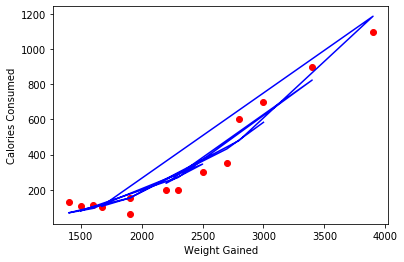

In [46]:
plt.scatter(x=calories['calories_consumed'],y=calories['weight_gained'],color='red')
plt.plot(calories['calories_consumed'],pred3, color='blue')
plt.xlabel('Weight Gained');plt.ylabel('Calories Consumed')
plt.show()

In [47]:
# In model 3, we get R-sq = 0.952